#### **Nudging to reconstruct pressure field from noisy measurement (1D)**

Max Error: 0.2691321642311956


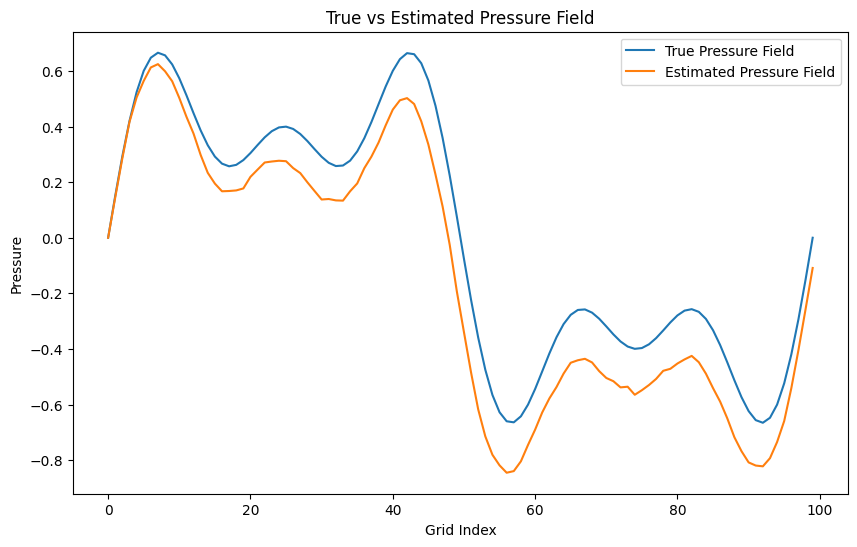

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def solver(mes_gradient, num_iter, num_points):
    """
    Reconstruct pressure field from a noisy pressure gradient measurement.

    Args:
        mes_gradient (array): Noisy pressure gradient measurement.
        num_iter (int): Number of iterations for the solver.
        num_points (int): Number of grid points.

    Returns:
        array: Estimate pressure field.
    """
    p = np.zeros((num_iter, num_points))  # initialize grid
    init_pressure = np.random.normal(0, 10, num_points) # initial pressure field
    p[0] = init_pressure # initialize pressure field
    p[:, 0] = true_pressure[0]  # dirichlet condition

    for i, z in enumerate(mes_gradient):
        P = 0.1  # posterior / prior variance
        R = 0.01  # measurement noise variance
        Q = 0.001  # gradient estimation variance (p[k,i]-p[k,i-1])

        for k in range(num_iter - 1):
            P = P + Q # Prior variance (Predict)
            K = P / (P + R)  # Kalman gain (Update)
            if i == 0:
                p[k+1, 1] = p[k, 1] + K * (z - (p[k, 1] - p[k, 0]))  # Posterior
            else:
                p[k+1, i] = p[k, i] + K * (z - (p[k, i] - p[k, i-1]))  # Posterior
            P = (1 - K) * P  # Posterior variance (Update)

    return p[-1]

# Solver parameters
num_points = 100  # grid spacing
num_iter = 100000  # number of iterations
np.random.seed(42)  # same set of random numbers

# Synthetic pressure field, gradient, and experimental measurement data
x = np.linspace(0, 1, num_points)  # normalized space
true_pressure = (
    0.5 * np.sin(2 * np.pi * 1 * x) +
    0.3 * np.sin(2 * np.pi * 3 * x) +
    0.2 * np.sin(2 * np.pi * 5 * x)
)
true_gradient = np.gradient(true_pressure)  # true gradient
noise = np.random.normal(0, 0.01, num_points)  # noise (normally distributed)
noisy_gradient = true_gradient + noise  # noisy gradient

# Solver function call
est_pressure = solver(noisy_gradient, num_iter, num_points) # estimated pressure field
error = np.abs(true_pressure - est_pressure) # array of error

# Display
print('Max Error:', np.max(error))
plt.figure(figsize=(10, 6))
plt.plot(true_pressure, label='True Pressure Field')
plt.plot(est_pressure, label='Estimated Pressure Field')
plt.legend()
plt.title('True vs Estimated Pressure Field')
plt.xlabel('Grid Index')
plt.ylabel('Pressure')
plt.show()


#### **Questions**
- what does a realistic experimental measurement look like? 
    - what does a realistic dataset look like?
    - what is a realistic noise distribution?
- am I correctly employing a kalman filter for this scenario? if not why?
- what is the covariance matrix (pk+1 = pk + K(yk * **C***pk)?
- what are good test cases to test a solver like this?


#### **To-Do**
- 1D --> 2D solver
- generate or find a more realistic (experimental measurement) dataset
- test edge cases? what are edge cases?
- variational interpretation and optimal gain
- profile solver (optimize performance)

#### **Bibliography** 
- https://iopscience.iop.org/article/10.1088/0957-0233/24/3/032001/pdf

- https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/tree/master

- http://www.openpiv.net/openpiv-pressure/files/PIV_99_paper_OCR.pdf

- https://arxiv.org/pdf/1612.07346.pdf

- https://sci-hub.se/10.1007/s10404-006-0088-5